# `yfinance` tutorial

**Author: Juan Pablo Triana Martinez**

**Date: 2026-01-25**

The following is a jupyter notebook in order to understand how to use `yfinance` library in order to retrieve specific **stock tickers** data. This would be crucial when dealing with our final project to *create regression models for gold and oil futures*.

In [ ]:
import yfinance as yf
import pandas as pd

# Let's get the microsoft stock
microsoft_stock = "MSFT"
msft = yf.Ticker(microsoft_stock)

### Get the financials of the company

In [ ]:
print(msft.financials)

                                                      2025-06-30  \
Tax Effect Of Unusual Items                        -7.708800e+07   
Tax Rate For Calcs                                  1.760000e-01   
Normalized EBITDA                                   1.606030e+11   
Total Unusual Items                                -4.380000e+08   
Total Unusual Items Excluding Goodwill             -4.380000e+08   
Net Income From Continuing Operation Net Minori...  1.018320e+11   
Reconciled Depreciation                             3.415300e+10   
Reconciled Cost Of Revenue                          8.783100e+10   
EBITDA                                              1.601650e+11   
EBIT                                                1.260120e+11   
Net Interest Income                                 2.620000e+08   
Interest Expense                                    2.385000e+09   
Interest Income                                     2.647000e+09   
Normalized Income                               

### Get the income or balance sheet

In [6]:
print(msft.balance_sheet)

                                                    2025-06-30    2024-06-30  \
Ordinary Shares Number                            7.434159e+09  7.434139e+09   
Share Issued                                      7.434159e+09  7.434139e+09   
Net Debt                                          1.290900e+10  3.331500e+10   
Total Debt                                        6.058800e+10  6.712700e+10   
Tangible Book Value                               2.013660e+11  1.216600e+11   
...                                                        ...           ...   
Cash Cash Equivalents And Short Term Investments  9.455500e+10  7.553100e+10   
Other Short Term Investments                      6.431300e+10  5.721600e+10   
Cash And Cash Equivalents                         3.024200e+10  1.831500e+10   
Cash Equivalents                                  1.853100e+10  6.744000e+09   
Cash Financial                                    1.171100e+10  1.157100e+10   

                                       

In [7]:
print(msft.info)

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consumer services;

### Let's get the price data for a particular security
in this case, we would be using bitcoin. This one has to be the same as it is in **yahoo finance**, the link for bitcoin is here:
* yahoo bitcoin link: https://finance.yahoo.com/quote/BTC-USD/

In [10]:
# Get the ticker properly
bitcoin_ticker = "BTC-USD"
btc = yf.Ticker(bitcoin_ticker)

# Return the stock price at this particular moment in time
print(btc.info["regularMarketPrice"])

86567.04


### Let's learn now how to obtain the prices of stocks
For this, we are gonna do the big three: **Tesla -> TSLA**, **Microsoft -> MSFT**, and **Apple -> AAPL**. We would be looking from a period of 3 years, from 2022 to 2026 today.

[*********************100%***********************]  3 of 3 completed


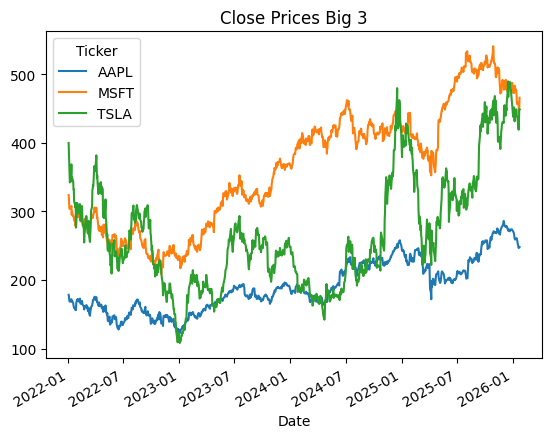

In [17]:
import matplotlib.pyplot as plt

# Let's get a list of tickers to analyze
data = yf.download(tickers=["MSFT", "TSLA", "AAPL"], start = "2022-01-01", end = "2026-01-25")
data["Close"].plot(title = "Close Prices Big 3")
plt.show()

In [28]:
for key, item in data.items():
    print(f"Column: {key}, item shape: {item.shape}, item stype: {item.dtype}")


Column: ('Close', 'AAPL'), item shape: (1018,), item stype: float64
Column: ('Close', 'MSFT'), item shape: (1018,), item stype: float64
Column: ('Close', 'TSLA'), item shape: (1018,), item stype: float64
Column: ('High', 'AAPL'), item shape: (1018,), item stype: float64
Column: ('High', 'MSFT'), item shape: (1018,), item stype: float64
Column: ('High', 'TSLA'), item shape: (1018,), item stype: float64
Column: ('Low', 'AAPL'), item shape: (1018,), item stype: float64
Column: ('Low', 'MSFT'), item shape: (1018,), item stype: float64
Column: ('Low', 'TSLA'), item shape: (1018,), item stype: float64
Column: ('Open', 'AAPL'), item shape: (1018,), item stype: float64
Column: ('Open', 'MSFT'), item shape: (1018,), item stype: float64
Column: ('Open', 'TSLA'), item shape: (1018,), item stype: float64
Column: ('Volume', 'AAPL'), item shape: (1018,), item stype: int64
Column: ('Volume', 'MSFT'), item shape: (1018,), item stype: int64
Column: ('Volume', 'TSLA'), item shape: (1018,), item stype: i

**This is gonna be important later when creating the dataset, since it gives a higher understanding on how many datapoints we have when looking from 3 years ago**

### Exporting to excel sheet: Balance sheet

In [ ]:
# Let's go back to our microsoft stock
msft = yf.Ticker("MSFT")
msft_balance = msft.balance_sheet
msft_balance.to_excel("MSFT_Balance_Sheet.xlsx")

### Exporting to excel sheet: Dividends

In [33]:
aapl = yf.Ticker("AAPL")
aapl_div = aapl.dividends
aapl_div.index = aapl_div.index.tz_localize(None)
aapl_div.to_excel("AAPL_Dividends.xlsx")